In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.98884800_1554454572_spin.jpg  
  inflating: Dataset/Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: Dataset/Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
  inflating: Dataset/Dataset/test_set/forest/1009821.jpg  
  inflating: Dataset/Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/1170x500_Ireland_web.jpg  
  inflating: Dataset/Dataset/test_set/forest/1200px_Mountainarea.jpg  
  inflating: Dataset/Dataset/test_set/forest/146019.jpg  
  inflating: Dataset/Dataset/test_set/forest/1506697583544.jpg  
  inflating: Dataset/Dataset/test_set

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/Dataset/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/Dataset/Dataset/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary') 

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [ ]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
14/14 [==============================] - 43s 3s/step - loss: 0.5613 - accuracy: 0.6766 - val_loss: 0.2961 - val_accuracy: 0.9091
Epoch 2/5
14/14 [==============================] - 40s 3s/step - loss: 0.2524 - accuracy: 0.8899 - val_loss: 0.0525 - val_accuracy: 0.9917
Epoch 3/5
14/14 [==============================] - 37s 3s/step - loss: 0.1955 - accuracy: 0.9174 - val_loss: 0.1793 - val_accuracy: 0.9174
Epoch 4/5
14/14 [==============================] - 37s 3s/step - loss: 0.1645 - accuracy: 0.9312 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 5/5
14/14 [==============================] - 37s 3s/step - loss: 0.1285 - accuracy: 0.9518 - val_loss: 0.0196 - val_accuracy: 1.0000


In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 6s 1s/step


In [ ]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [ ]:
print(len(predictions))

121


In [ ]:
model.save("/content/forest1.h5")

In [ ]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [ ]:
model = load_model("/content/forest1.h5")

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("No Fire",fontsize=30)

1/1 [==============================] - 0s 96ms/step
[[1.]]


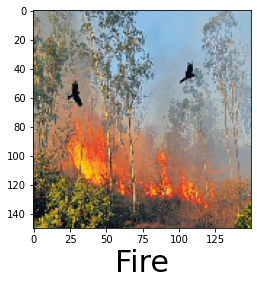

In [ ]:
predictImage("/content/Dataset/Dataset/test_set/with fire/599857.jpg")

1/1 [==============================] - 0s 34ms/step
[[0.]]


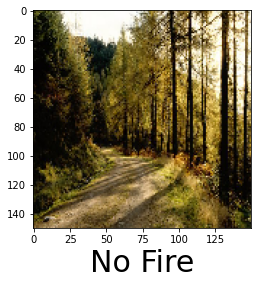

In [ ]:
predictImage("/content/Dataset/Dataset/test_set/forest/1009821.jpg")

1/1 [==============================] - 0s 34ms/step
[[1.]]


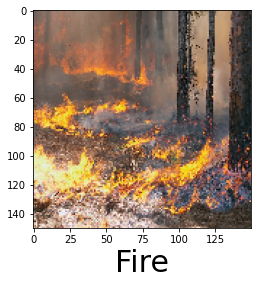

In [ ]:
predictImage("/content/Dataset/Dataset/train_set/with fire/with fire (104).jpg")

1/1 [==============================] - 0s 38ms/step
[[0.]]


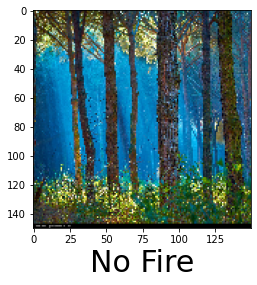

In [ ]:
predictImage("/content/Dataset/Dataset/train_set/forest/with_fire (111).jpg")

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=1174df3785342b80c9f5b5d4a515a849acd7b795c04ec87a88c895684f8aa1a8
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [ ]:
#load the saved model
model = load_model(r'/content/forest1.h5')
#define video
video = cv2.VideoCapture('/content/No fire video testing.mp4')
#define the features
name = ['forest','with forest']

In [ ]:
account_sid = 'AC2d64cab8606f25324a644047ba9cbb34'
auth_token = '615fd973852e30c1fffe52fad572d250'
client = Client(account_sid, auth_token)

message = client.messages \
    .create(
         body='Forest fire is detected , stay alert',
         from_='+13149485411',
         to='+919500269540'
     )

print(message.sid)
print('Fire Detected')
print('SMS sent!')


SMe5c22057e505ead1ebbae53dda624868
Fire Detected
SMS sent!


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
while(1):
  success,frame=video.read()
  cv2.imread("/content/Dataset/Dataset/test_set/with fire/Wild_fires.jpg",frame)
  img=image.load_img("/content/Dataset/Dataset/test_set/forest/1009821.jpg",target_size=(150,150))
  test_dataset=image.img_to_array(img)
  test_dataset=np.expand_dims(test_dataset,axis=0)
  predictions=model.predict(test_dataset)
  p=predictions[0]
  print(predictions)
  #cv2.putText(frame, "predicted class = "+str(name[p], (50,50),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1))
  if predictions[0]==1:
    #twilio account ssid
    account_sid='AC2d64cab8606f25324a644047ba9cbb34'
    #twilio account authentication token
    auth_token ='615fd973852e30c1fffe52fad572d250'
    client=Client(account_sid,auth_token)

    message=client.messages \
    .create(
        body='Forest Fire is detected,stay alert',
        #use twilio free number
        from_='+13149485411',
        #to number
        to='+919500269540')
    print(message.sid)
    print('Fire Detected')
    print('SMS sent!')
   # playsound('../tornado-siren-in-streamwood-il-35510.mp3')
  else:
    print('No Danger')
    #break
cv2.imshow("image",frame)
#if cv2.waitKey(1) & 0xFF == ord('a'):
                       # break 
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 35ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 35ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 34ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 41ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 40ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 37ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 38ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 39ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 37ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 43ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 38ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 35ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 36ms/step
[[0.]]
No Danger
1/1 [==============================] - 0s 34ms/step
[[0.]]
No Danger
1/1 [=============================

KeyboardInterrupt: ignored

In [ ]:
while(1):
  success,frame=video.read()
  cv2.imread("/content/Dataset/Dataset/test_set/with fire/Wild_fires.jpg",frame)
  img=image.load_img("/content/Dataset/Dataset/test_set/with fire/in_forestfires_shutter.jpg",target_size=(150,150))
  test_dataset=image.img_to_array(img)
  test_dataset=np.expand_dims(test_dataset,axis=0)
  predictions=model.predict(test_dataset)
  p=predictions[0]
  print(predictions)
  #cv2.putText(frame, "predicted class = "+str(name[p], (50,50),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1))
  if predictions[0]==1:
    #twilio account ssid
    account_sid='AC2d64cab8606f25324a644047ba9cbb34'
    #twilio account authentication token
    auth_token ='615fd973852e30c1fffe52fad572d250'
    client=Client(account_sid,auth_token)

    message=client.messages \
    .create(
        body='Forest Fire is detected,stay alert',
        #use twilio free number
        from_='+13149485411',
        #to number
        to='+919500269540')
    print(message.sid)
    print('Fire Detected')
    print('SMS sent!')
   # playsound('../tornado-siren-in-streamwood-il-35510.mp3')
  else:
    print('No Danger')
    #break
cv2.imshow("image",frame)
#if cv2.waitKey(1) & 0xFF == ord('a'):
                       # break 
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 35ms/step
[[1.]]
SM63427a9d4297643b656b992657991cd7
Fire Detected
SMS sent!
1/1 [==============================] - 0s 34ms/step
[[1.]]
SMcfdd8dde4a169da484986a9e547ec141
Fire Detected
SMS sent!
1/1 [==============================] - 0s 37ms/step
[[1.]]
SMf3b9d9f267980af5c4cc9f86fcc0b150
Fire Detected
SMS sent!
1/1 [==============================] - 0s 38ms/step
[[1.]]
SM80fcc0edbc46e5ce1d094aac5756864d
Fire Detected
SMS sent!
1/1 [==============================] - 0s 35ms/step
[[1.]]
SM77cc480828d57d5af00f40b26b56c583
Fire Detected
SMS sent!
1/1 [==============================] - 0s 34ms/step
[[1.]]
SMbc2d562a17e54bbe82b816dd9ac4d680
Fire Detected
SMS sent!
1/1 [==============================] - 0s 34ms/step
[[1.]]
SM980022569ecb40caf58978eb1418b60f
Fire Detected
SMS sent!
1/1 [==============================] - 0s 32ms/step
[[1.]]
SM00fd48ce14dcb29a6ef9776193420ed9
Fire Detected
SMS sent!
1/1 [==============================] - 0s 33ms/step
[[1.

KeyboardInterrupt: ignored